In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv("sales_data_with_discounts.csv")
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [27]:
data.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [28]:
data=data.set_index(pd.DatetimeIndex(data['Date']))

In [29]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Date,,,,,,,,,,,,,
2021-01-04,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
2021-01-04,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2021-01-04,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
2021-01-04,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
2021-01-04,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [30]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [31]:
data.mean(numeric_only=True)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [32]:
data.median(numeric_only=True)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [33]:
data.std(numeric_only=True)

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [34]:
data.mode(numeric_only=True)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [35]:
data1=data.rename(columns={'Avg Price':'avg_price',
                           'Discount Rate (%)':'dis_rate(%)',
                           'Discount Amount':'dis_amount',
                           'Total Sales Value':'total_sales_value',
                           'Net Sales Value':'net_sales_value'})
data1

,Date,Day,SKU,City,Volume,BU,Brand,Model,avg_price,total_sales_value,dis_rate(%),dis_amount,net_sales_value
Date,,,,,,,,,,,,,
2021-01-04,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
2021-01-04,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2021-01-04,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
2021-01-04,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
2021-01-04,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
2021-04-15,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
2021-04-15,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394


In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 2021-01-04 to 2021-04-15
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   avg_price          450 non-null    int64  
 9   total_sales_value  450 non-null    int64  
 10  dis_rate(%)        450 non-null    float64
 11  dis_amount         450 non-null    float64
 12  net_sales_value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 49.2+ KB


In [37]:
data1['Brand'].value_counts()

Brand
Jeera      90
Gear       60
Viva       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Sumsang    30
Orange     30
Name: count, dtype: int64

<Axes: xlabel='Brand'>

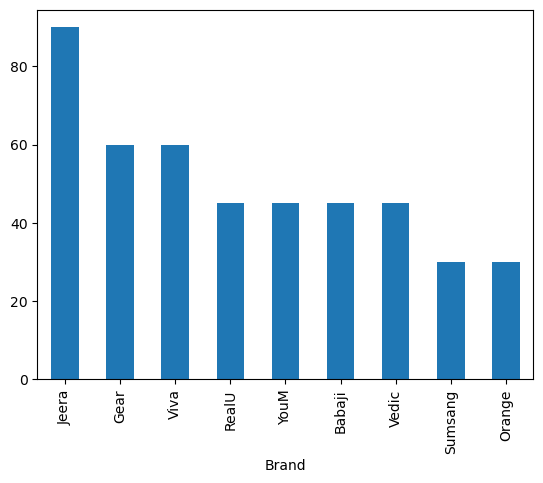

In [38]:
data1['Brand'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

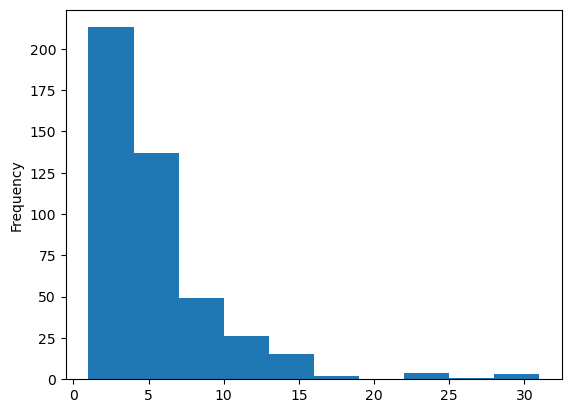

In [39]:
data1['Volume'].plot(kind='hist',bins=10)

<Axes: ylabel='Density'>

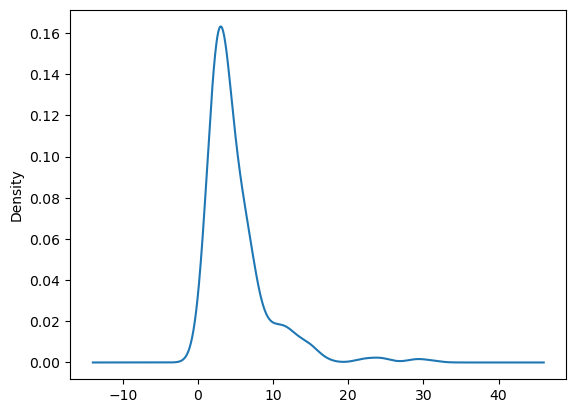

In [40]:
data1['Volume'].plot(kind='kde')

{'whiskers': [<matplotlib.lines.Line2D at 0x203fed3c140>,
 'caps': [<matplotlib.lines.Line2D at 0x203febece60>,
 'boxes': [<matplotlib.lines.Line2D at 0x203febeff20>],
 'medians': [<matplotlib.lines.Line2D at 0x203fed3ca10>],
 'fliers': [<matplotlib.lines.Line2D at 0x203fed3ccb0>],
 'means': []}

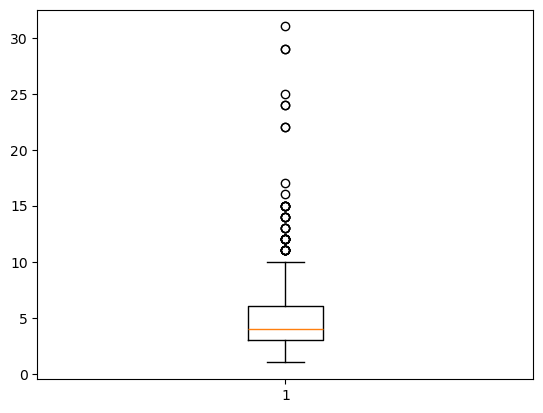

In [41]:
plt.boxplot(data1['Volume'])

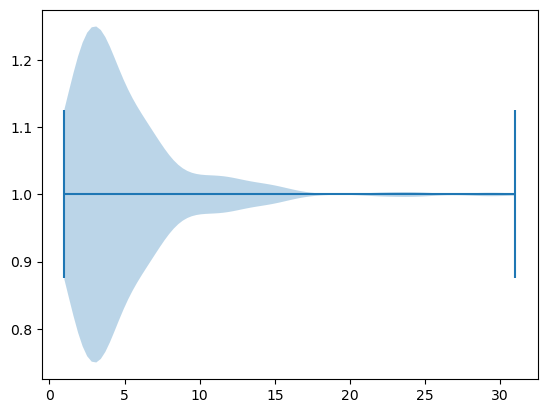

In [42]:
plt.violinplot(data1['Volume'],vert=False)
plt.show()

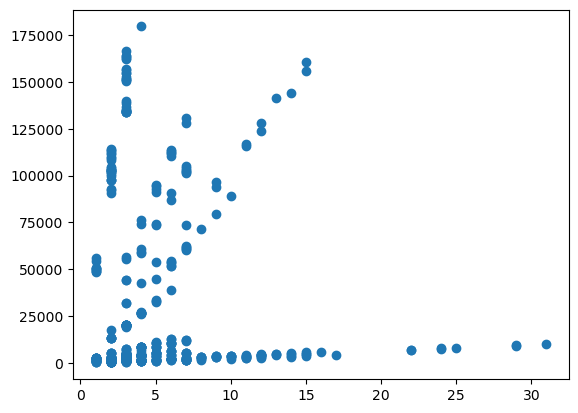

In [43]:
plt.scatter(data1['Volume'],data1['net_sales_value'])

In [44]:
!pip install sklearn
from sklearn.preprocessing import StandardScaler
array=data1.values()
scaler=StandardScaler()
standard_data=scaler.fit_transform(array)
standard_data

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

TypeError: 'numpy.ndarray' object is not callable

In [45]:
data2=pd.get_dummies(data1,dtype=int,drop_first=True)
data2

,Volume,avg_price,total_sales_value,dis_rate(%),dis_amount,net_sales_value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,15,12100,181500,11.654820,21153.498820,160346.501180,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-04,10,10100,101000,11.560498,11676.102961,89323.897039,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-04,7,16100,112700,9.456886,10657.910157,102042.089843,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2021-01-04,6,20100,120600,6.935385,8364.074702,112235.925298,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2021-01-04,3,8100,24300,17.995663,4372.946230,19927.053770,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-04-15,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2021-04-15,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
def get_stand(x):
    return (x-x.mean())/x.std()

stand_data=data1.select_dtypes(include='number').apply(get_stand)
stand_data.head()

,Volume,avg_price,total_sales_value,dis_rate(%),dis_amount,net_sales_value
Date,,,,,,
2021-01-04,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
2021-01-04,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2021-01-04,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
2021-01-04,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
2021-01-04,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
